<h1 style="font-family:'Poppins', Arial, sans-serif; font-weight:700; color:#1e8449; text-align:center; margin-bottom:20px; letter-spacing:1px; font-size:40px;">👨‍💻 Author: <span style="color:#0cd865;">Ali Hassan</span></h1>

<div style="text-align:center; margin-top:20px; line-height:3; font-size:18px;">
  <span style="margin-right:8px;"></span><a href="https://github.com/Ali-Shahzadd"><img src="https://img.shields.io/badge/GitHub-Profile-181717?style=flat-square&logo=github&logoColor=white" alt="GitHub" style="height:30px;"></a>
  <span style="margin-left:15px; margin-right:8px;"></span><a href="https://www.kaggle.com/alihassanshahzad786"><img src="https://img.shields.io/badge/Kaggle-Profile-20BEFF?style=flat-square&logo=kaggle&logoColor=white" alt="Kaggle" style="height:30px;"></a>
  <span style="margin-left:15px; margin-right:8px;"></span><a href="https://www.linkedin.com/in/ali-hassan-3952a2290/"><img src="https://img.shields.io/badge/LinkedIn-Profile-0077B5?style=flat-square&logo=linkedin&logoColor=white" alt="LinkedIn" style="height:30px;"></a>
  <span style="margin-left:15px; margin-right:8px;"></span><a href="https://x.com/alishahzadddd?s=21"><img src="https://img.shields.io/badge/Twitter-Profile-1DA1F2?style=flat-square&logo=twitter&logoColor=white" alt="Twitter" style="height:30px;"></a>
</div>



<h1 style="
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
    font-size: 2.4rem;
    font-weight: 700;
    color: #1e6091;
    margin-top: 20px;
    letter-spacing: 1px;
">
    🏥 Medical Insurance Cost Prediction
</h1>


# About Dataset
Context
Machine Learning with R by Brett Lantz is a book that provides an introduction to machine learning using R. As far as I can tell, Packt Publishing does not make its datasets available online unless you buy the book and create a user account which can be a problem if you are checking the book out from the library or borrowing the book from a friend. All of these datasets are in the public domain but simply needed some cleaning up and recoding to match the format in the book.

Content
Columns

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

In [109]:
# importing libraires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR


In [110]:
df=pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [111]:
df.shape

(1338, 7)

In [112]:
# cheking the values counts in each column
print(df['sex'].value_counts())
print('===============')
print(df['smoker'].value_counts())
print('===============')
print(df['region'].value_counts())

sex
male      676
female    662
Name: count, dtype: int64
smoker
no     1064
yes     274
Name: count, dtype: int64
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


In [113]:
# checking for null values
df.isnull().sum()   

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

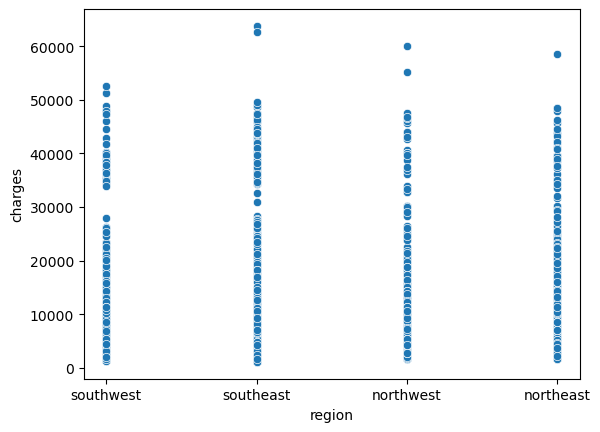

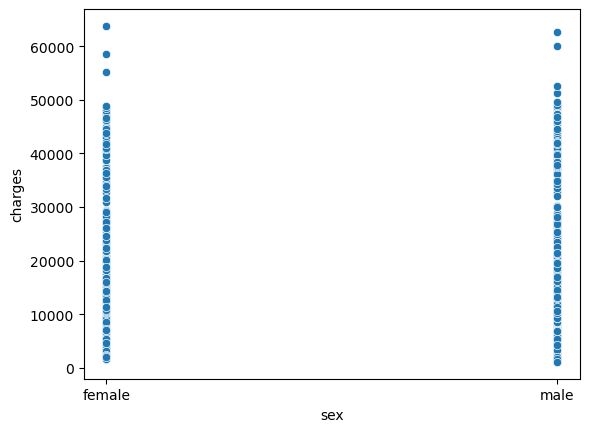

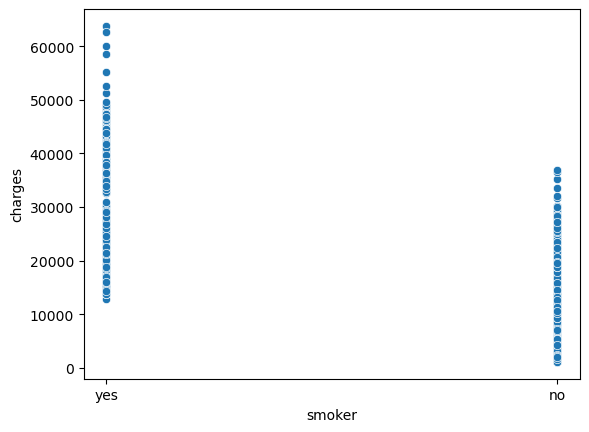

In [114]:
# visualizing the region and charges
sns.scatterplot(data=df,x='region',y='charges')
plt.show()
sns.scatterplot(data=df,x='sex',y='charges')
plt.show()
sns.scatterplot(data=df,x='smoker',y='charges')
plt.show()

C:\Windows\Temp\ipykernel_13352\3161664550.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


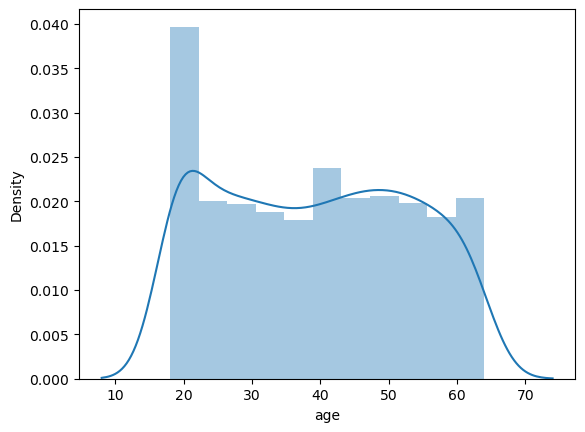

In [115]:
# distribution of age column
sns.distplot(df['age'])
plt.show()

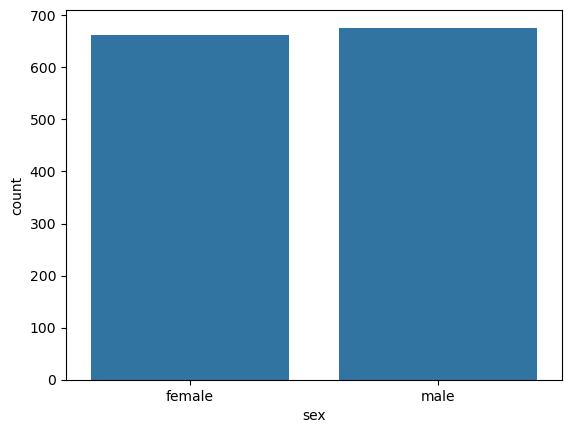

In [116]:
# Gender column
sns.countplot(data=df,x='sex')
plt.show()

C:\Windows\Temp\ipykernel_13352\1071820862.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'])


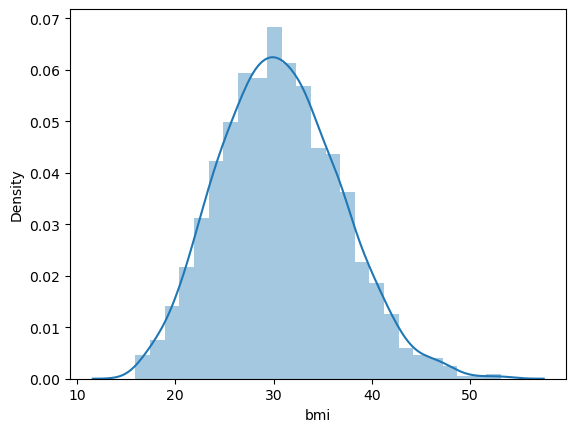

In [117]:
# distribution of bmi column
sns.distplot(df['bmi'])
plt.show()

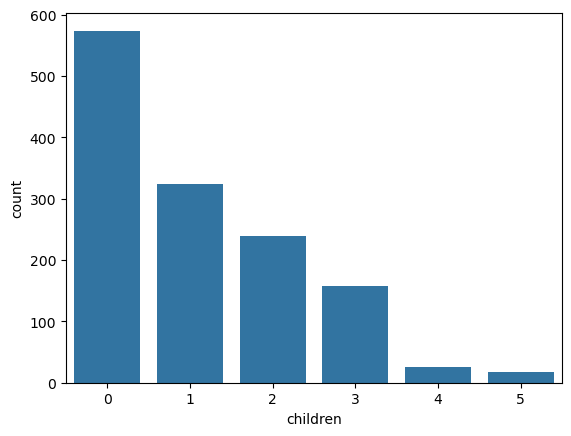

In [118]:
# checking the countplot for childrens
sns.countplot(data=df,x='children')
plt.show()

In [119]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [120]:
# Encoding the categirical column to numerical colmumn
le=LabelEncoder()
df['sex']=le.fit_transform(df['sex'])
df['smoker']=le.fit_transform(df['smoker'])
df['region']=le.fit_transform(df['region'])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [121]:
# Now seperating the x and y
X=df.drop('charges',axis=1)
Y=df['charges']
print(X)
print(Y)

      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       3
1      18    1  33.770         1       0       2
2      28    1  33.000         3       0       2
3      33    1  22.705         0       0       1
4      32    1  28.880         0       0       1
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       1
1334   18    0  31.920         0       0       0
1335   18    0  36.850         0       0       2
1336   21    0  25.800         0       0       3
1337   61    0  29.070         0       1       1

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [122]:
# training the data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)
print(X.shape,X_train.shape,X_test.shape)
print(Y.shape,Y_train.shape,Y_test.shape)

(1338, 6) (1070, 6) (268, 6)
(1338,) (1070,) (268,)


In [123]:
# using the linear regression model
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [124]:
# checking the accuracy

y_train_predict=model.predict(X_train)
rmse=np.sqrt(mean_squared_error(Y_train,y_train_predict))
print("The model performance for training set")
print('RMSE is {}'.format(rmse))
print("\n")

y_test_predict=model.predict(X_test)
rmse=np.sqrt(mean_squared_error(Y_test,y_test_predict))
print("The model performance for testing set")
print('RMSE is {}'.format(rmse))

The model performance for training set
RMSE is 6008.670641259382


The model performance for testing set
RMSE is 6193.935113523997


In [125]:
# checking the r2
r2_train=model.score(X_train,Y_train)
r2_test=model.score(X_test,Y_test)
print("The model performance for training set")
print('R2 is {}'.format(r2_train))
print("\n")
print("The model performance for testing set")
print('R2 is {}'.format(r2_test))

The model performance for training set
R2 is 0.7519923667088932


The model performance for testing set
R2 is 0.7445422986536503


In [126]:
# now predicting

input_data=(18,	1,	33.770,	1,	0,	2)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=model.predict(input_data_reshaped)
print(prediction)

[3853.31683494]


e:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Random Forest Tree Works Better than Linear Regression

In [127]:
# Now fitting the trained into random forest algorithm
rfg=RandomForestRegressor()
rfg.fit(X_train,Y_train)

RandomForestRegressor()

In [128]:
# checking the accuracy

y_train_predict=rfg.predict(X_train)
rmse=np.sqrt(mean_squared_error(Y_train,y_train_predict))
print("The model performance for training set")
print('RMSE is {}'.format(rmse))
print("\n")

y_test_predict=rfg.predict(X_test)
rmse=np.sqrt(mean_squared_error(Y_test,y_test_predict))
print("The model performance for testing set")
print('RMSE is {}'.format(rmse))

The model performance for training set
RMSE is 1812.6003925230832


The model performance for testing set
RMSE is 5066.869889756647


In [131]:
# now predicting
input_data=(33,	1,	22.705,	0,	0,	1)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=rfg.predict(input_data_reshaped)
print(prediction)


[15181.0007474]


e:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
